In [1]:
%matplotlib notebook

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from PIL.TiffTags import TAGS

In [3]:
from pyScatt.packages import *

In [4]:
#TAGS

In [5]:
def load_labsaxs( filename ):
    '''YG_dev@CFN Feb, 2020
    Load txt file generated by NanoStar software, the txt contains x,y, and image data
    Input:
        filename: string
    Output:
        x: one-D array
        y: one-D array
        data: 2D array
    '''
    d = np.loadtxt( filename ,  delimiter =',',  dtype='str')
    y= np.array( d[0,1:], dtype='float' )
    x= np.array( d[1:,0], dtype='float' )
    data = np.array( d[1:,1:], dtype='float' )
    return x,y,data.T
def load_imagedata( filename ):
    '''YG_dev@CFN July, 2020
    Load image data generated by NanoStar, the file contains 2D data
    Input:
        filename: string
    Output:
        img: 2D array        
    '''     
    return np.array( Image.open( filename ) )
    

def load_metadata( filename ):
    '''YG_dev@CFN July, 2020
    Load meta data generated by NanoStar, the file contains tags as metadata
    Input:
        filename: string
    Output:
        meta_dict: a doctionary of the metadata
        
    '''        
    meta_dict ={}
    with Image.open( inDir + fp ) as img:
        md = img.tag
        ts = list( TAGS.keys())
        ks = list( img.tag.keys())    
        for key in ks:
            if key in ts:
                meta_dict[ TAGS[key] ] =  img.tag[key]     
    return meta_dict                



In [6]:
inDir =  '/home/group/Ocean/SaxsLabData/NYU_Mar2020/'

In [7]:
outDir = '/home/yuzhang/XScattering/LabSAXS/Results/'

## Load and Show raw tiff

In [8]:
fp  = 'latest_0015735_caz.tiff'
im = load_imagedata( inDir + fp ).T 

In [9]:
md = load_metadata( inDir + fp ) 

In [10]:
md

{'ImageWidth': (487,),
 'ImageLength': (619,),
 'BitsPerSample': (32,),
 'Compression': (1,),
 'PhotometricInterpretation': (1,),
 'DateTimeOriginal': (3.0,),
 'DateTImeDigitized': (0.0,),
 'ImageDescription': ('# Pixel_size 172e-6 m x 172e-6 m\r\n# Silicon sensor, thickness 0.000450 m\r\n# Exposure_time 9999.000000 s\r\n# Exposure_period 10332.300000 s\r\n# Tau = 0 s\r\n# Count_cutoff 1147717 counts\r\n# Threshold_setting: 4024 eV\r\n# Gain_setting: autog (vrf = 1.000)\r\n# N_excluded_pixels = 7\r\n# Excluded_pixels: badpix_mask.tif\r\n# Flat_field: (nil)\r\n# Trim_file: p3-0265_E8048_T4024.bin\r\n# Image_path: /data/datatemp/\r\n# Ratecorr_lut_directory: ContinuousStandard_v1.1\r\n# Retrigger_mode: 1\r\n\x00ate',),
 'Model': ('PILATUS3 300K, S/N 3-0265\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',),
 'StripOffsets': (5970,),
 'SampleFormat': (2,),
 'RowsPerStrip': (619,),
 'StripByteCounts': (1205812,),
 'XResolution': ((619, 7),),
 'YResol

In [11]:
md['Artist']

('<?xml version="1.0" ?><SAXSLABparameters><param name="det_pixel_size">172e-6 172e-6</param><param name="det_thickness">0.000450</param><param name="det_exposure_time">9999.000000</param><param name="det_exposure_period">10332.300000</param><param name="det_tau">0</param><param name="det_count_cutoff">1147717</param><param name="det_threshold_setting">4024</param><param name="det_n_excluded_pixels">7</param><param name="det_excluded_pixels">badpix_mask.tif</param><param name="det_flat_field">(nil)</param><param name="det_trim_directory">p3-0265_E8048_T4024.bin</param><param name="datatype">tiff</param><param name="detectortype">Pilatus</param><param name="detector_function">saxs</param><param name="detector_sn">dec1350</param><param name="meastype"></param><param name="start_timestamp">Wed Mar 04 22:26:31 2020</param><param name="end_timestamp"></param><param name="save_timestamp"></param><param name="realtime"></param><param name="livetime">10000.00</param><param name="pixelsize">0.1

<IPython.core.display.Javascript object>


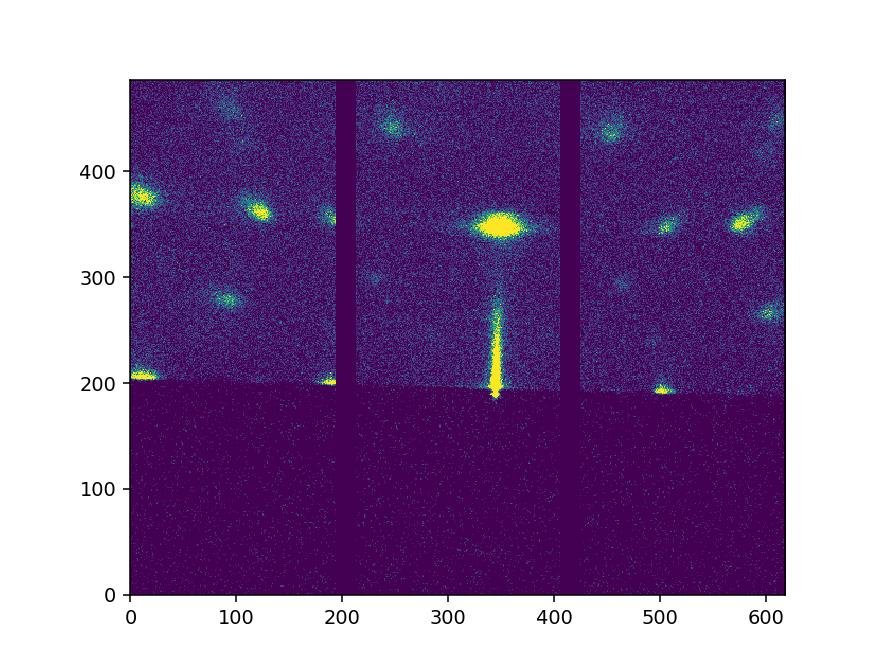

In [12]:
plt.figure()
plt.imshow(im, vmin=.1, vmax=1e1, origin='lower')

In [68]:
res = {}
res['metadata']  = md
res['image'] = {}
res['image']['data'] = im
res['image']['label'] =  ['x (pix)', 'y (pix)']

dicttoh5( res, outDir + fp + '.h5')

## Load  and show polar tiff

In [13]:
fp = 'Ogr_th01_0015738_caz.tif'
im = load_imagedata( inDir + fp ) 
im.shape

(487, 619)

In [14]:
md = load_metadata( inDir + fp ) 

<IPython.core.display.Javascript object>


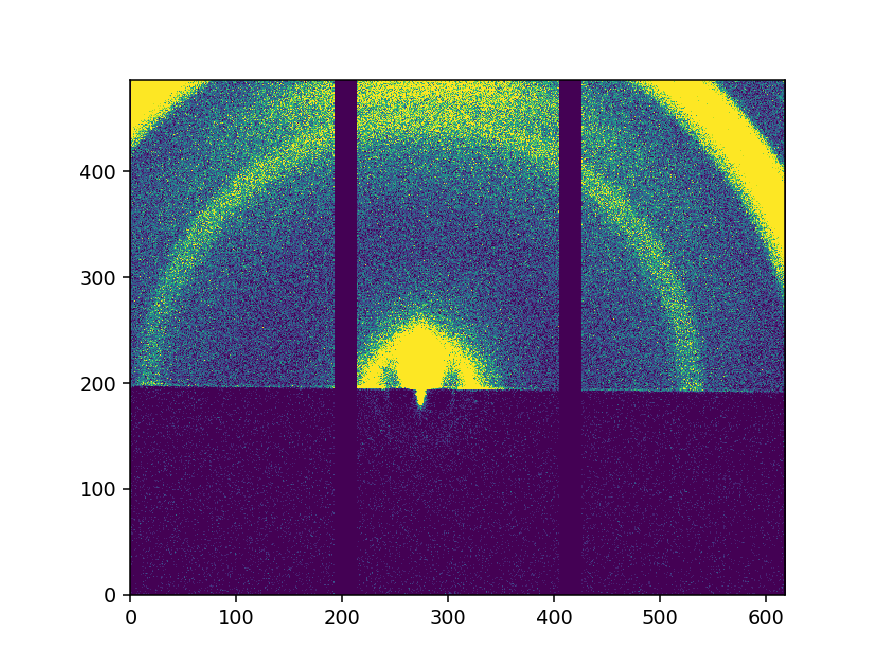

In [15]:
plt.figure()
plt.imshow(im, vmin=.1, vmax=1e1, origin='lower')

In [16]:
res = {}
res['metadata']  = md
res['image'] = {}
res['image']['data'] = im
res['image']['label'] =  ['x (pix)', 'y (pix)']

dicttoh5( res, outDir + fp + '.h5')

## Load and show the txt file

In [17]:
fp = 'Pervsc_03_15735.txt'
x,y,im=load_labsaxs( inDir +fp  )

<IPython.core.display.Javascript object>


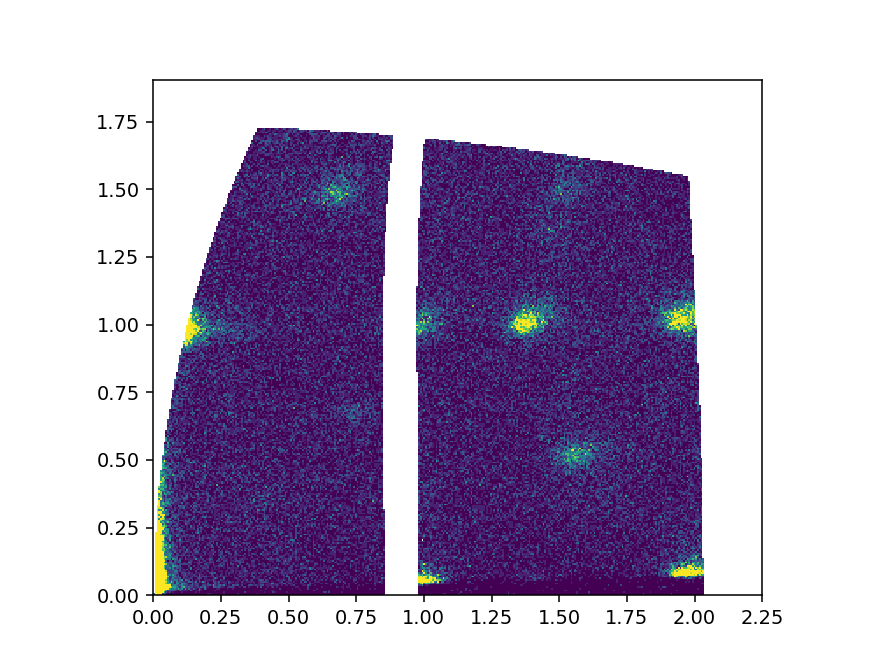

In [18]:
plt.figure()
plt.imshow(im, vmin=.1, vmax=1e1, origin='lower', extent = [ x.min(),x.max(),y.min(),y.max()    ] )

In [19]:
res = {}
res['image'] = {}
res['image']['data'] = im
res['image']['label'] =  ['x (pix)', 'y (pix)']
res['image']['x'] =  {'data': x, 'label': ['qx'] } 
res['image']['y'] =  {'data': y, 'label': ['qz'] } 
dicttoh5( res, outDir + fp + '.h5')